# Multilayer Perceptrons and Backpropagation Algorithm

## Exercise H3.2:   MLP Regression


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time 



In [2]:
data = np.genfromtxt(fname='RegressionData.txt', dtype=np.float)
x = data[:,0]
yT = data[:,1]


In [3]:
#for now, the x we insert here is just one input value x(alpha)

def mlp_forward(x,a,N,N_i,N_out,w_10,w_21):
    
    x = x[a]
    #hidden layer operations
    
    x_bias = np.array([1,x]) #input point + bias node
    act_hidden = np.matmul(w_10,x_bias) #activity of the hidden neurons
    out_hidden = np.tanh(act_hidden) #output of the hidden neuons without bias
    out_hidden_bias = np.insert(out_hidden,0,1) #output of the hidden neurons with bias
    
    #output layer operations
    act_out = np.matmul(w_21,out_hidden_bias)
    
    return [act_hidden,out_hidden_bias,act_out]

In [4]:
def out_error(a,act_out,yT):
    y_calc = act_out
    quad_error = 0.5*(yT[a] - y_calc)**2
    return quad_error

    

The derivative of the hyperbolic tangent is:

$\frac{d}{dx} tanh x$ = 1 - $tanh^2 x$

In [5]:
def der_tanh(x):
    der = 1 - (np.tanh(x))**2
    return der

In [6]:
def mlp_back(w_10,w_21,act_hidden,out_hidden_bias,act_out):
#for the output neuron, since we have a linear transfer function, the error is equal to 1
    
    
    local_error = der_tanh(act_hidden)*w_21[0][1:]
    error_bias = w_21[0][0]
    
    local_error_bias = np.insert(local_error,0,error_bias)
    
    return [local_error,local_error_bias]
    

# $\frac{\partial e^{(\alpha)}_{w}}{\partial \omega_{ij}^{v^{'}v}}$ = $\frac{\partial e^{(\alpha)}_{w}}{\partial y(x^{(\alpha)},w)}$ $\frac{\partial y(x^{(\alpha)},w)}{\partial \omega_{ij}^{v^{'}v}}$ =  $\frac{\partial e^{(\alpha)}_{w}}{\partial y(x^{(\alpha)},w)}$$\delta_{i}^{v^{'}}$ $f_{j}^{v}(h_{j}^{v})$


### Remember that: $e = \frac{1}{2}(yT - y(x^{(\alpha)},w))^{2}$


# $\frac{\partial e^{(\alpha)}_{w}}{\partial y(x^{(\alpha)},w)}$ = $y(x^{(\alpha)},w)$ - yT

### Which means that:

# $\frac{\partial e^{(\alpha)}_{w}}{\partial \omega_{ij}^{v^{'}v}}$ = [$y(x^{(\alpha)},w)$ - yT][$\delta_{i}^{v^{'}}$ $f_{j}^{v}(h_{j}^{v})$]

In [7]:
def error_gradient(x,a,yT,act_hidden,out_hidden_bias,act_out,local_error,local_error_bias):
        
    der_error_y = act_out - yT[a]
    
    gradient_21 = der_error_y*out_hidden_bias
    
    gradient_10 = (np.ones((N,N_i+1))*der_error_y)*local_error[:,None]
    gradient_10[:,1] = gradient_10[:,1]*x[a]
    
    return [gradient_10, gradient_21]

In [8]:
N = 3
N_i = 1
N_out = 1
eta = 0.5
t_max = 3000
small_error = 1e-5

norm = 1./len(x)



def gradient_descent_regression():
    np.random.seed(int(time.time()))

    w_10 = np.random.uniform(-0.5,0.5,(N,N_i+1))
    w_21 = np.random.uniform(-0.5,0.5,(N_out,N+1))

    E_init = 0.
    t = 0

    ET_vec = np.zeros(t_max)

    while(True):
        delta_ET = 0.
        ET = 0.

        gradient_10 = np.zeros((N,N_i+1))
        gradient_21 = np.zeros((N_out,N+1))

        for a in range(len(x)):
            [act_hidden_a,out_hidden_bias_a,act_out_a] = mlp_forward(x,a,N,N_i,N_out,w_10,w_21)
            [local_error_a,local_error_bias_a] = mlp_back(w_10,w_21,act_hidden_a,out_hidden_bias_a,act_out_a)
            [gradient_10_a, gradient_21_a] = error_gradient(x,a,yT,act_hidden_a,out_hidden_bias_a,act_out_a,local_error_a,local_error_bias_a)
            gradient_10 += gradient_10_a
            gradient_21 += gradient_21_a
            e_a = out_error(a,act_out_a,yT)
            ET += e_a

        ET = ET*norm
        gradient_10 = -gradient_10*norm
        gradient_21 = -gradient_21*norm


        delta_ET = ET - E_init
        E_init = ET
        ET_vec[t] = ET
        t += 1

        error_test = abs(delta_ET)/ET

        if (error_test <= small_error) or (t>t_max):

            print("Number of iterations t: ", t)
            print("Error in last step: ", error_test, ET)
            break

        else:
            w_10 += eta*gradient_10
            w_21 += eta*gradient_21 

    ET_vec = ET_vec[:t]

    return [ET_vec,w_10,w_21,t]




In [9]:
[ET_vec,w_10,w_21,t] = gradient_descent_regression()

Number of iterations t:  2398
Error in last step:  [8.44187761e-06] [0.02747714]


#### a) Plot the error ET over the iterations.

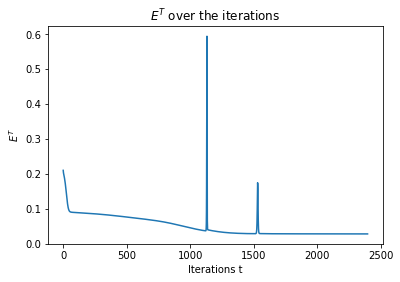

In [10]:
time_steps = np.arange(t)
plt.plot(time_steps, ET_vec)
plt.xlabel("Iterations t")
plt.ylabel("$E^T$")
plt.title("$E^{T}$ over the iterations")
plt.show()

#### b) For the final network, plot the output of hidden units for all inputs

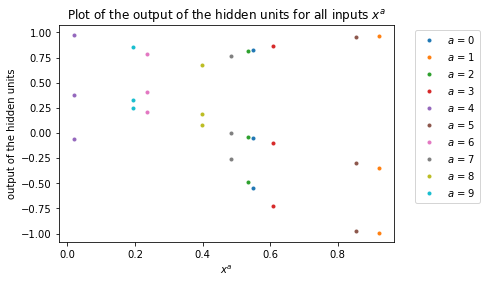

In [11]:
act_out_final = np.zeros(len(x))
out_hidden_bias_final = [mlp_forward(x,a,N,N_i,N_out,w_10,w_21)[1] for a in range(len(x))]

for a in range(len(x)):
    act_out_final[a] = mlp_forward(x,a,N,N_i,N_out,w_10,w_21)[2]
    
x_expand = (np.ones((3,len(x)))*x).T


for i in range(len(x)):
    plt.plot(x_expand[i], out_hidden_bias_final[i][1:], '.',label =  '$a$ = {}'.format(i))

plt.xlabel('$x^{a}$')
plt.ylabel('output of the hidden units')
plt.title('Plot of the output of the hidden units for all inputs $x^{a}$')
plt.legend( bbox_to_anchor=(1.05, 1),loc='upper left')
plt.show()    

#### c) Plot the output values over the input space (i.e. the input-output function of the net-work) together with the training dataset.

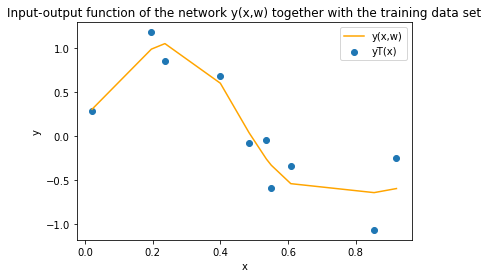

In [12]:
act_out_final
x_sort_idx = np.argsort(x)
act_out_final_sorted = act_out_final[x_sort_idx[::1]]
x_sorted = x[x_sort_idx[::1]]
yT_sorted = yT[x_sort_idx[::1]]

plt.plot(x_sorted, act_out_final_sorted, color = 'orange',label = "y(x,w)")
plt.scatter(x_sorted, yT_sorted, label = "yT(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Input-output function of the network y(x,w) together with the training data set")
plt.show()

#### d) Plot (a)–(c) twice (i.e., for different initial conditions) next to each other and discuss: Is there a difference, and if so, why?

In [13]:
[ET_vec_2,w_10_2,w_21_2,t_2] = gradient_descent_regression()


Number of iterations t:  2479
Error in last step:  [3.61328119e-06] [0.02651589]


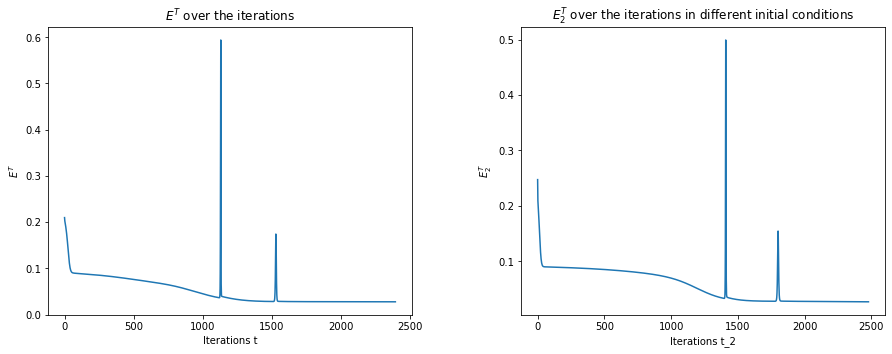

In [14]:
time_steps_2 = np.arange(t_2)

plt.figure(figsize=(15, 8))

plt.subplot(121)
plt.plot(time_steps, ET_vec)
plt.xlabel("Iterations t")
plt.ylabel("$E^T$")
plt.title("$E^{T}$ over the iterations")


plt.subplot(122)
plt.plot(time_steps_2, ET_vec_2)
plt.xlabel("Iterations t_2")
plt.ylabel("$E^T_2$")
plt.title("$E^{T}_2$ over the iterations in different initial conditions")

plt.subplots_adjust(bottom=0.25, top=0.75,wspace = 0.3)
plt.show()

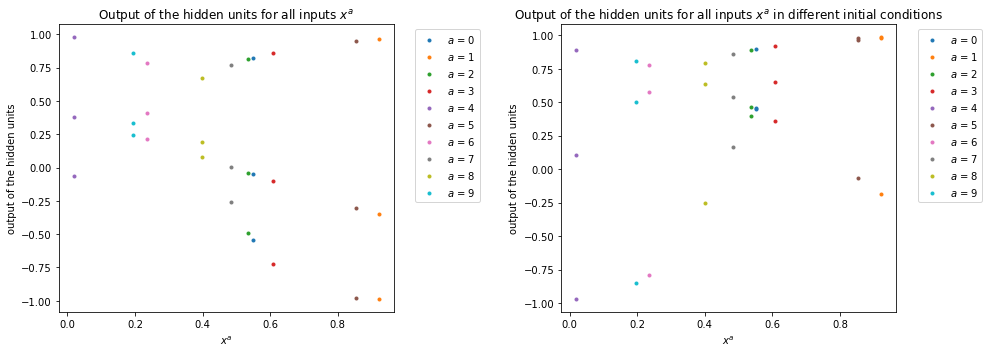

In [15]:
act_out_final_2 = np.zeros(len(x))
out_hidden_bias_final_2 = [mlp_forward(x,a,N,N_i,N_out,w_10_2,w_21_2)[1] for a in range(len(x))]


plt.figure(figsize=(15, 8))
plt.subplot(121)

for i in range(len(x)):
    plt.plot(x_expand[i], out_hidden_bias_final[i][1:], '.',label =  '$a$ = {}'.format(i))

plt.xlabel('$x^{a}$')
plt.ylabel('output of the hidden units')
plt.title('Output of the hidden units for all inputs $x^{a}$')
plt.legend( bbox_to_anchor=(1.05, 1),loc='upper left')


plt.subplot(122)

for i in range(len(x)):
    plt.plot(x_expand[i], out_hidden_bias_final_2[i][1:], '.',label =  '$a$ = {}'.format(i))

plt.xlabel('$x^{a}$')
plt.ylabel('output of the hidden units')
plt.title('Output of the hidden units for all inputs $x^{a}$ in different initial conditions')
plt.legend( bbox_to_anchor=(1.05, 1),loc='upper left')

plt.subplots_adjust(bottom=0.25, top=0.75,wspace = 0.5)
plt.show()

In [16]:
for a in range(len(x)):
    act_out_final_2[a] = mlp_forward(x,a,N,N_i,N_out,w_10_2,w_21_2)[2]

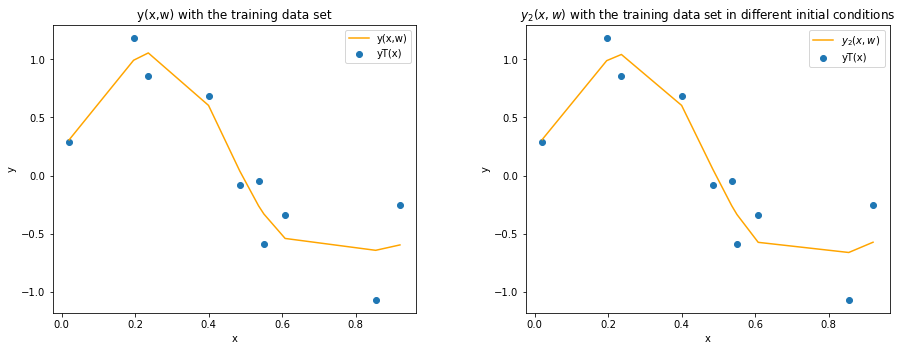

In [17]:
act_out_final_sorted_2 = act_out_final_2[x_sort_idx[::1]]

plt.figure(figsize=(15, 8))

plt.subplot(121)
plt.plot(x_sorted, act_out_final_sorted, color = 'orange',label = "y(x,w)")
plt.scatter(x_sorted, yT_sorted, label = "yT(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("y(x,w) with the training data set")

plt.subplot(122)
plt.plot(x_sorted, act_out_final_sorted_2, color = 'orange',label = "$y_2(x,w)$")
plt.scatter(x_sorted, yT_sorted, label = "yT(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("$y_2(x,w)$ with the training data set in different initial conditions")

plt.subplots_adjust(bottom=0.25, top=0.75,wspace = 0.3)

plt.show()